<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Analysis-and-Importance-of-Groupby-in-Pandas-but-not-Just-pd.groupby" data-toc-modified-id="Data-Analysis-and-Importance-of-Groupby-in-Pandas-but-not-Just-pd.groupby-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Analysis and Importance of Groupby in Pandas but not Just pd.groupby</a></span><ul class="toc-item"><li><span><a href="#Updates" data-toc-modified-id="Updates-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Updates</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Creating-a-Dummy-Data" data-toc-modified-id="Creating-a-Dummy-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating a Dummy Data</a></span></li><li><span><a href="#Number-of-Posts-According-to-Category" data-toc-modified-id="Number-of-Posts-According-to-Category-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Number of Posts According to Category</a></span></li><li><span><a href="#Number-of-Views-According-to-Category" data-toc-modified-id="Number-of-Views-According-to-Category-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Number of Views According to Category</a></span></li><li><span><a href="#Views-and-Count-According-to-Day-Time" data-toc-modified-id="Views-and-Count-According-to-Day-Time-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Views and Count According to Day Time</a></span></li><li><span><a href="#Views-According-to-Month" data-toc-modified-id="Views-According-to-Month-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Views According to Month</a></span></li><li><span><a href="#Number-of-Views-Per-Month-According-to-Category" data-toc-modified-id="Number-of-Views-Per-Month-According-to-Category-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Number of Views Per Month According to Category</a></span></li><li><span><a href="#Rate-of-Views-Change-Per-Month" data-toc-modified-id="Rate-of-Views-Change-Per-Month-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Rate of Views Change Per Month</a></span></li><li><span><a href="#Rate-of-Views-Change-Per-Month-According-to-Category" data-toc-modified-id="Rate-of-Views-Change-Per-Month-According-to-Category-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Rate of Views Change Per Month According to Category</a></span></li></ul></li></ul></div>

# Data Analysis and Importance of Groupby in Pandas but not Just pd.groupby
This blog will be continously updated as I find new ways, tricks to make things work faster and easier.

## Updates
* January 5 2022
    * Started blog and written up to [**Rate of Views Change Per Month According to Category**](#Rate-of-Views-Change-Per-Month-According-to-Category).

What would you like to become in $y= mx+c$? Please don't say `+`.

## Introduction
I have been working with Pandas frequently and most of the time I have to do groupby. But I have noticed that `pd.groupby` is not always what I should do. Before diving into hands on experience, I would like to share some scenarios but first lets assume that you are working in a media company:
1. What if your manager asks you to find the trend of content reach/growth in monthly basis so that they could know whether the contents have desired effect or not? Where you have one datetime column in timestamp format.
2. What if your social media manager asks you to find the top 10 category of post with respect to profession of viewers so that they could make more focused and personalized contents dedicating to them and increase vies.
3. You see there is a chance of being promoted and you want to give some valuable insights? What if you to present a best time to post a particular type of content. For example, a comedy or funny content might get best views during the day, a nature or motivating content might get good views during morning and a loving or musical content might get good views during the night.

Above 3 examples are some high level problem statement but in the ground level, almost every analyst have to group the data. Here in this blog, I am going to create a dummy data and perform some of analysis using groupby with it.

## Creating a Dummy Data
> **The data will be generated randomly and thus it might not make any sense in the realworld but the goal of this blog is to explain/explore ways to do groupby in Pandas.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


sns.set(rc={'figure.figsize':(40, 20),
                "axes.titlesize" : 24,
                "axes.labelsize" : 20,
                "xtick.labelsize" : 16,
                "ytick.labelsize" : 16})
plt.rc("figure", figsize=(16,8))
warnings.filterwarnings('ignore')

Lets suppose your number of contents per day ranges from 3 to 7. Your views from the date of publish to 1 week could range from 2k to 100k and it also grows by 0.1% after reaching 100 views. 

In [41]:
dates = pd.date_range(pd.to_datetime("2020-01-01"), pd.to_datetime("2021-01-01"))
times = ["Morning", "Day", "Night"]
categories = ["Motivating", "Musical", "Career", "News", "Funny"]
posts = list(range(5, 11))

content_dict = {"post_id":[], "date":[], "dtime": [], "category":[], "views": []}
post_id = 0

month = []
rate = 0.1

for d in dates:
    post_count = posts[np.random.randint(len(posts))]
    
    for p in range(post_count):
        if len(content_dict["date"])%100==0:
            rate+=0.1
        dtime = times[np.random.randint(len(times))]
        category = categories[np.random.randint(len(categories))]
        views = np.random.randint(20000, 100000) * rate
        
        content_dict["post_id"].append(post_id)
        content_dict["date"].append(d)
        content_dict["dtime"].append(dtime)
        content_dict["category"].append(category)
        content_dict["views"].append(views)
        post_id+=1
        
df = pd.DataFrame(content_dict, columns=list(content_dict.keys()))
df

,post_id,date,dtime,category,views
0,0,2020-01-01,Night,Funny,19536.8
1,1,2020-01-01,Day,Funny,5048.0
2,2,2020-01-01,Night,News,13165.0
3,3,2020-01-01,Day,Career,12326.8
4,4,2020-01-01,Morning,News,19512.8
...,...,...,...,...,...
2735,2735,2021-01-01,Day,Musical,180803.4
2736,2736,2021-01-01,Morning,Motivating,203542.3
2737,2737,2021-01-01,Morning,Musical,161295.1
2738,2738,2021-01-01,Morning,Motivating,143900.9


The data is ready and now we could start our analysis.

## Number of Posts According to Category

Using normal groupby. [More at here](https://pandas.pydata.org/docs/reference/groupby.html).

<AxesSubplot:xlabel='category'>

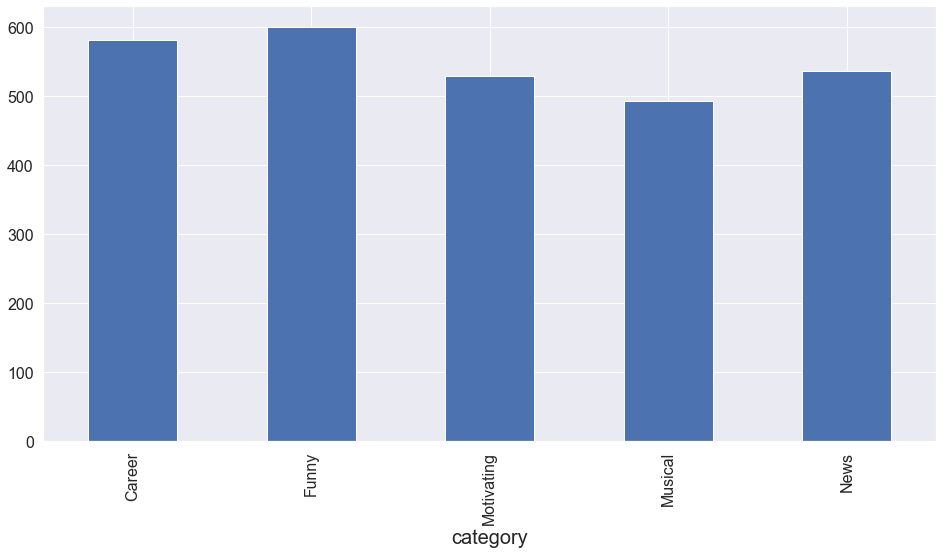

In [48]:
df.groupby("category").post_id.count().plot(kind="bar")

## Number of Views According to Category

<AxesSubplot:xlabel='category'>

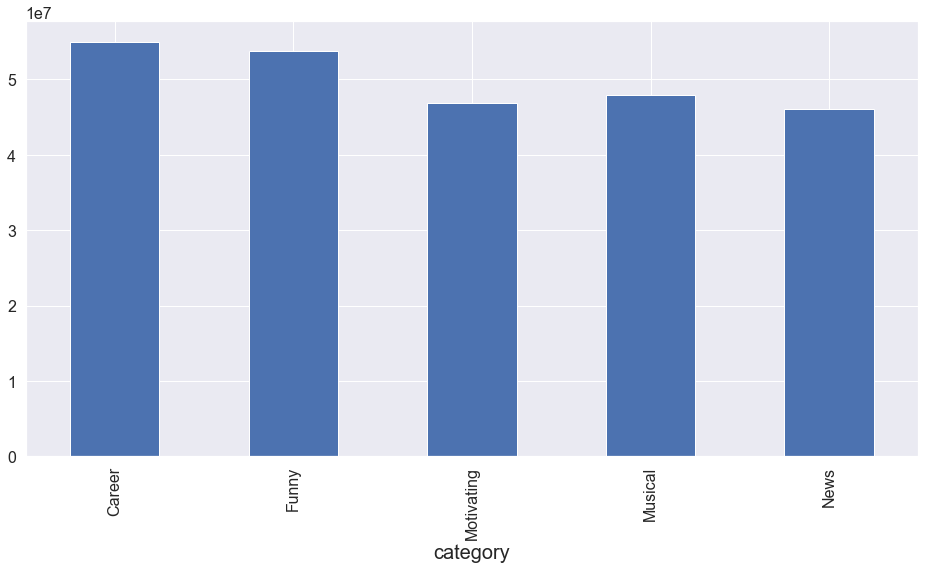

In [49]:
df.groupby("category").views.sum().plot(kind="bar")

Pretty easy right?

Lets try something more.

## Views and Count According to Day Time

<AxesSubplot:xlabel='dtime'>

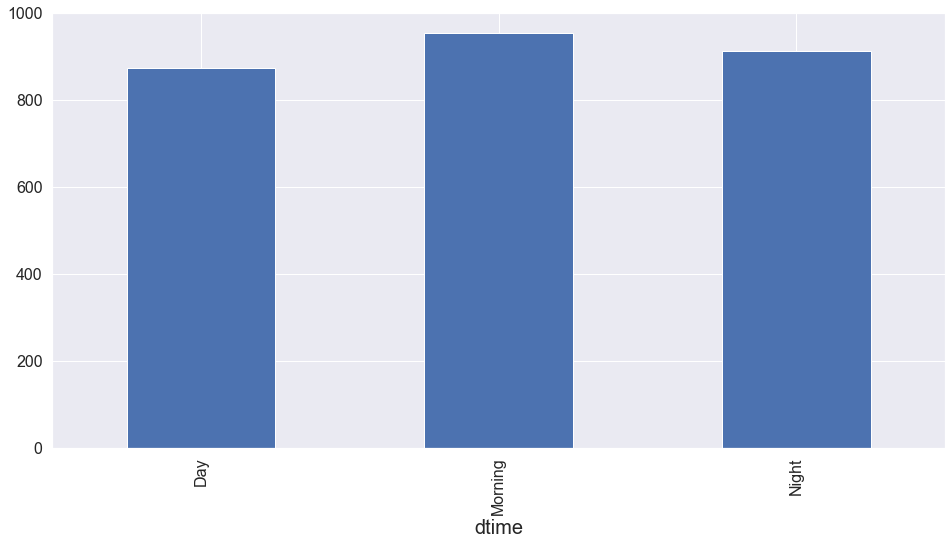

In [51]:
df.groupby("dtime").post_id.count().plot(kind="bar")

<AxesSubplot:xlabel='dtime'>

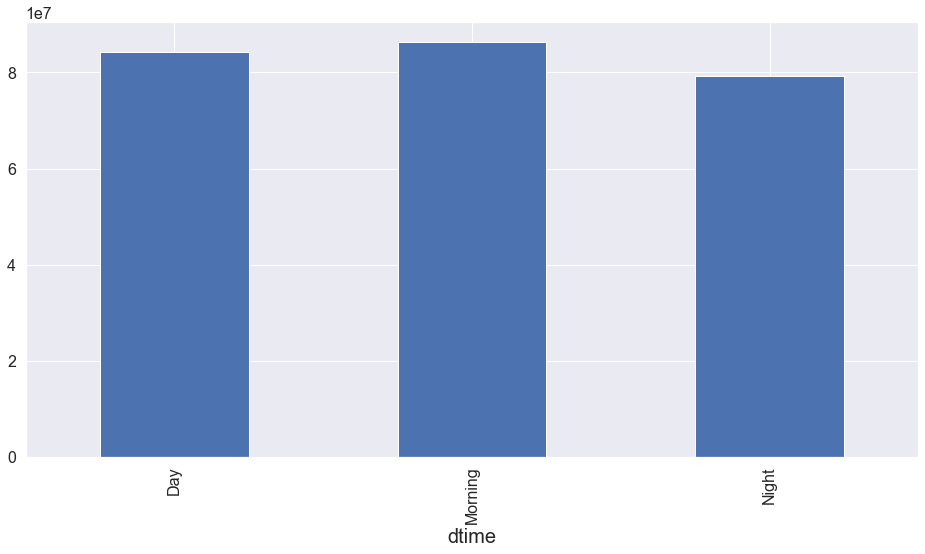

In [52]:
df.groupby("dtime").views.sum().plot(kind="bar")

## Views According to Month

Using resample on date according to month. We could use week, quarter and also more flexible times to resample. (More at here)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample].

<AxesSubplot:xlabel='date'>

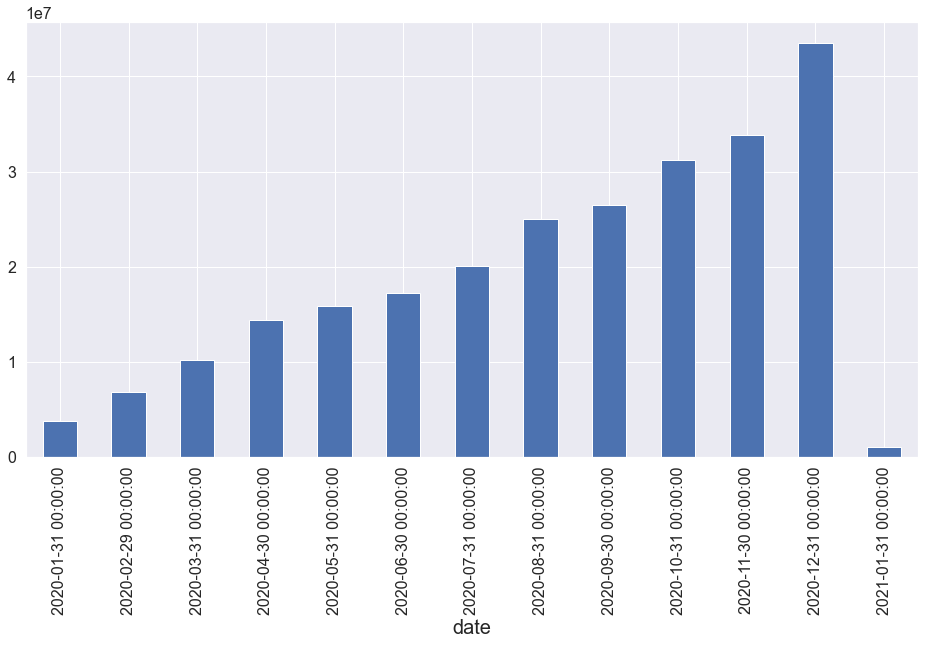

In [86]:
df.resample(rule='M', on='date')["views"].sum().plot(kind="bar")

In above step, we groupped the data according the month and took sum of views. But will it meet our next requirement?

## Number of Views Per Month According to Category

Using Grouper to groupby month inside a groupby. [More at here](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html).

<AxesSubplot:xlabel='category,date'>

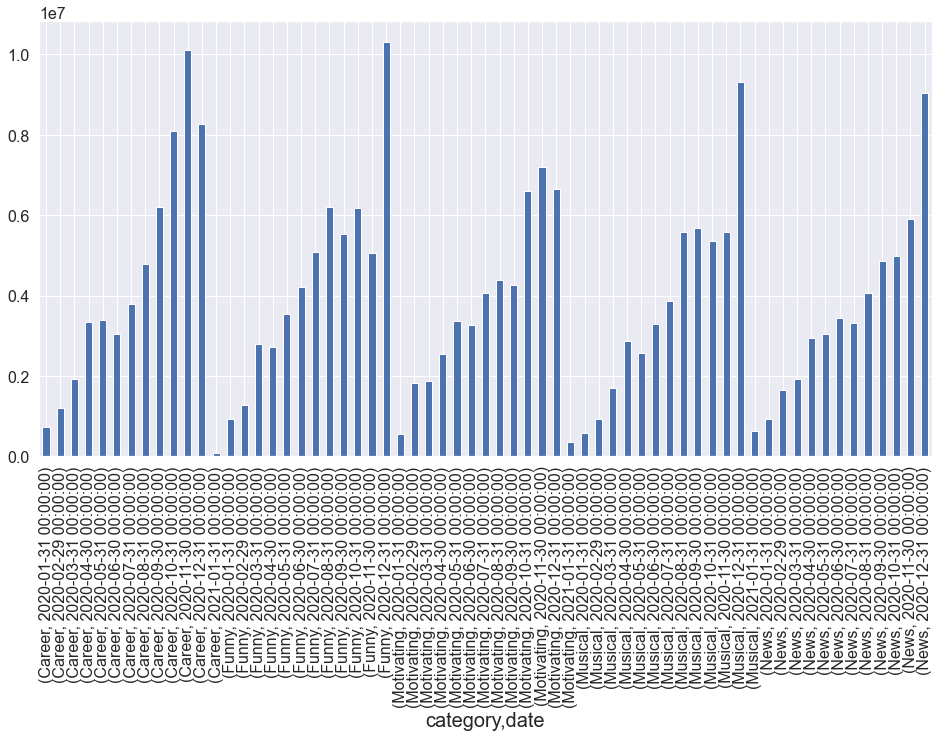

In [95]:
df.groupby(["category", pd.Grouper(key="date", freq="1M")]).views.sum().plot(kind="bar")

Why not make our plot little bit more awesome?

In [130]:
vdf = df.groupby(["category", pd.Grouper(key="date", freq="1M")]).views.sum().rename("Views").reset_index()
vdf["date"] = vdf["date"].dt.date

def bar_plot(data, title="Views", xax=None,yax=None, hue=None):

    fig, ax = plt.subplots(figsize = (50, 30))   
    fig = sns.barplot(x = xax, y = yax, data = data, 
                 ci = None, ax=ax, hue=hue)
    plt.legend(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xticks(fontsize=40, rotation=80)
    plt.title(title, fontsize=50)
    plt.xlabel(xax, fontsize=50)
    plt.ylabel(yax, fontsize=50)
    plt.show()

I love to make my own custom visualization function. That gives me more flexibility and less time to tune sizes.

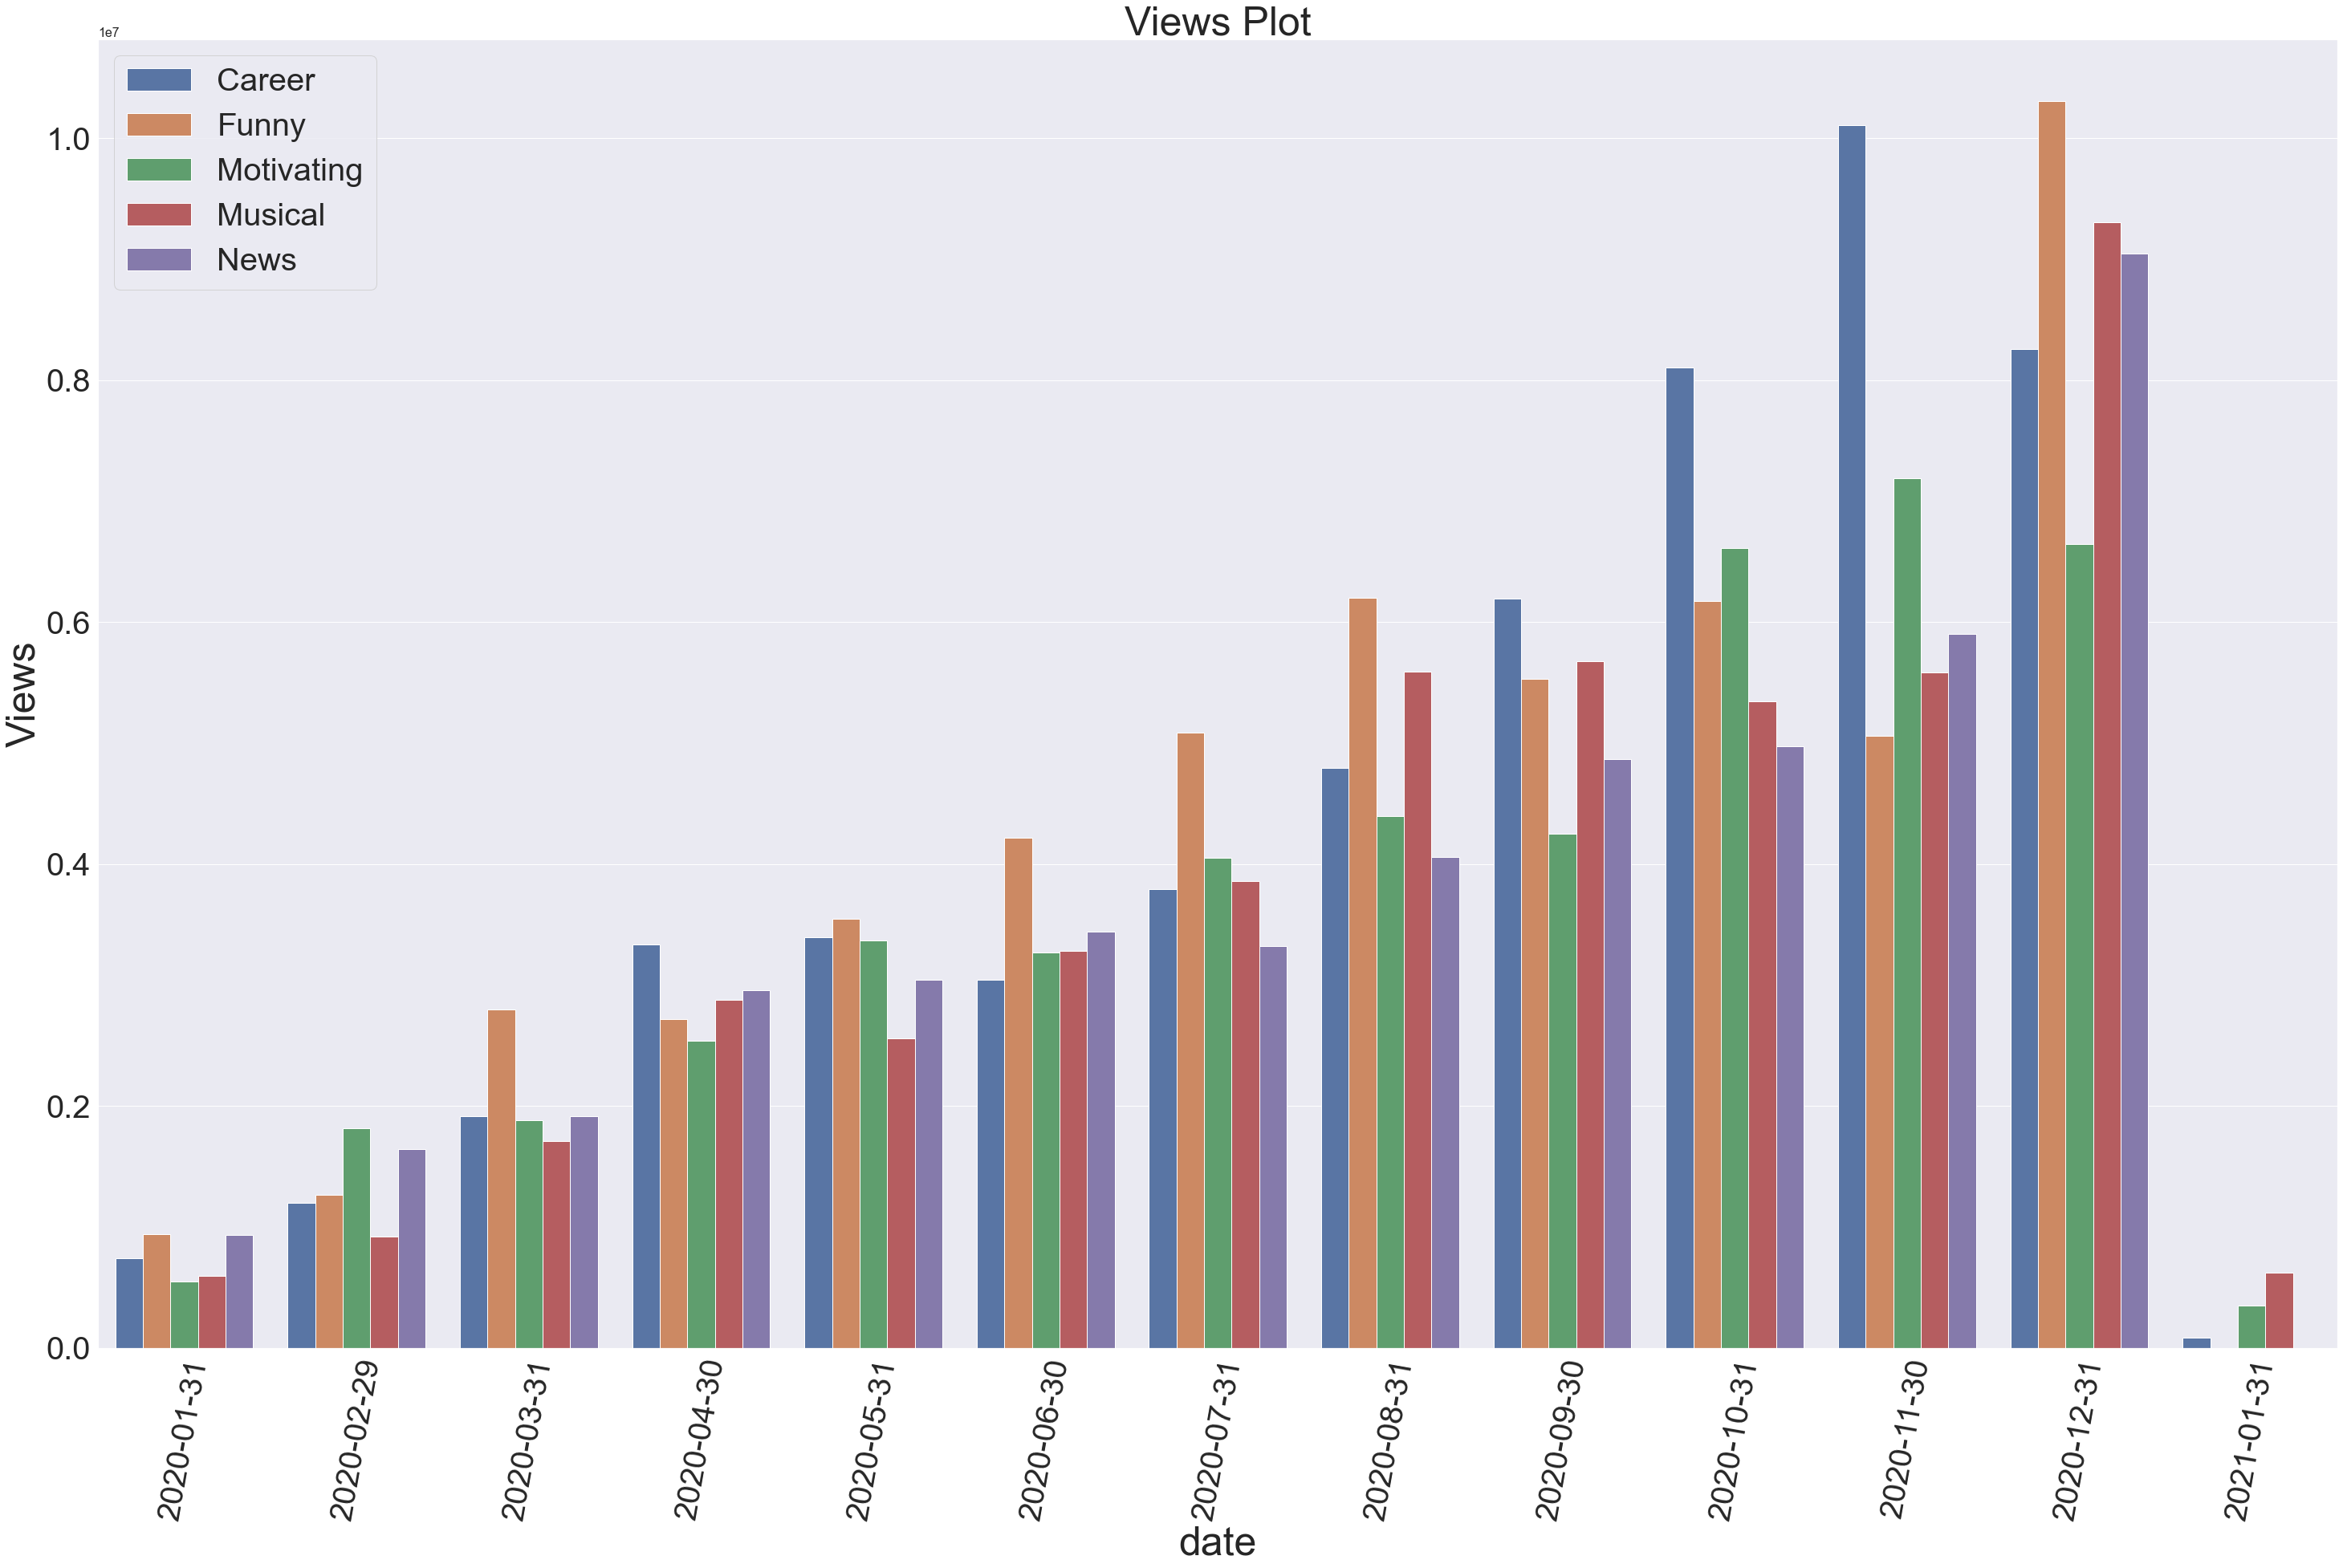

In [131]:
bar_plot(vdf, title="Views Plot", xax="date", yax="Views", hue="category")

Can you find some insights or make some argument by looking over above data? Your result will definately be different than mine because of the random data used on above.

## Rate of Views Change Per Month

<AxesSubplot:xlabel='date'>

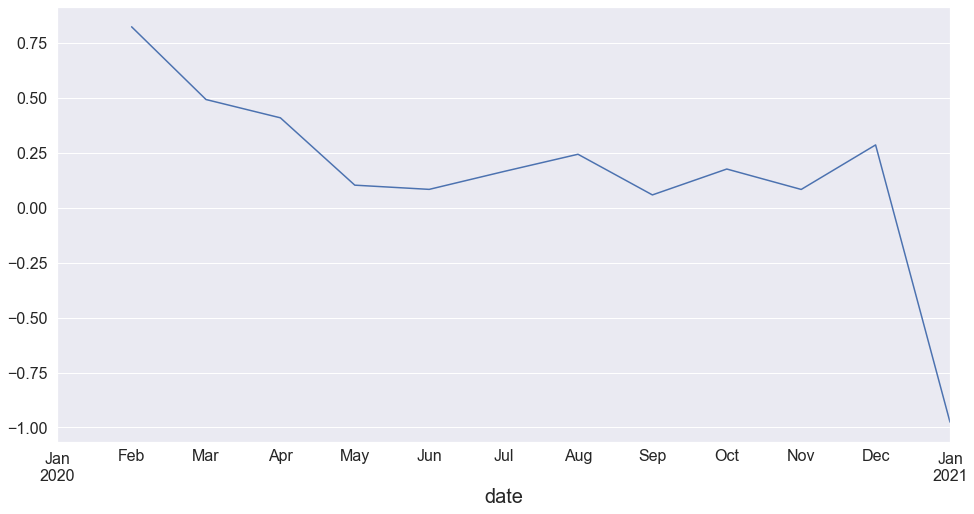

In [139]:
df.groupby([pd.Grouper(key="date", freq="1M")]).views.sum().pct_change().plot(kind="line")

## Rate of Views Change Per Month According to Category

Using shift inside the groupby object.

In [170]:
vdf = df.groupby(["category", pd.Grouper(key="date", freq="1M")]).views.sum().rename("Sums").reset_index()
lags = vdf.groupby("category").Sums.shift(1)
vdf["Rate"] = (vdf["Sums"]-lags)/lags
vdf

,category,date,Sums,Rate
0,Career,2020-01-31,738533.2,NaN
1,Career,2020-02-29,1199889.7,0.624693
2,Career,2020-03-31,1913763.8,0.594950
3,Career,2020-04-30,3330908.0,0.740501
4,Career,2020-05-31,3390679.1,0.017944
...,...,...,...,...
58,News,2020-08-31,4054761.3,0.221326
59,News,2020-09-30,4865650.4,0.199984
60,News,2020-10-31,4976088.2,0.022697
61,News,2020-11-30,5903048.6,0.186283


<AxesSubplot:xlabel='date', ylabel='Rate'>

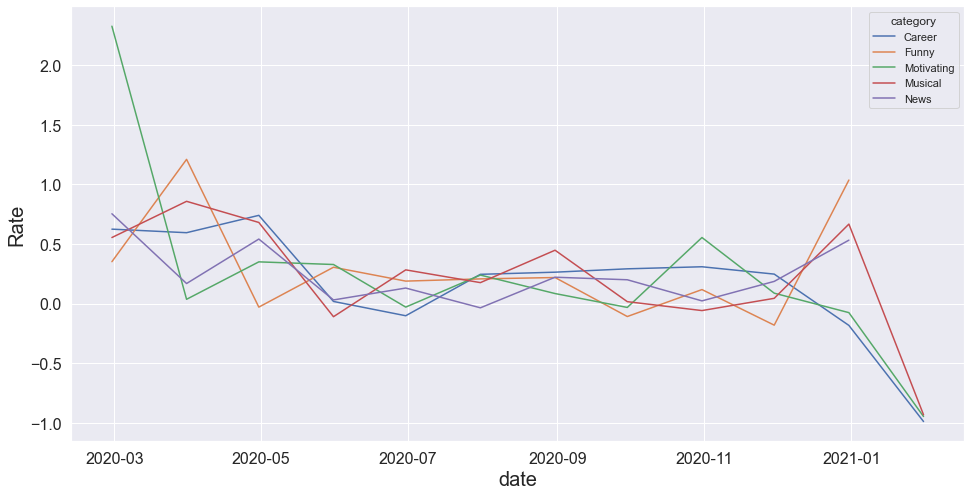

In [173]:
sns.lineplot(data=vdf,x="date", y="Rate", hue="category")

Because of being random data, we can not find any valuable information but we can see that the views has been decreased up to negative values in months like June. Lets verify that.

In [174]:
vdf[vdf.Rate<0]

,category,date,Sums,Rate
5,Career,2020-06-30,3044816.8,-0.102004
11,Career,2020-12-31,8259240.0,-0.183001
12,Career,2021-01-31,84401.6,-0.989781
16,Funny,2020-04-30,2716427.3,-0.029595
21,Funny,2020-09-30,5526894.3,-0.108572
23,Funny,2020-11-30,5058885.1,-0.180990
30,Motivating,2020-06-30,3270395.5,-0.029415
33,Motivating,2020-09-30,4252837.6,-0.032287
36,Motivating,2020-12-31,6643837.5,-0.075897
37,Motivating,2021-01-31,347443.2,-0.947704


More ways and ideas will be updated soon.